#MULTI-DOMAIN DATA ANALYSIS PORTFOLIO

In [1]:
!pip install pandas numpy matplotlib seaborn fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=eb3186376fb412f176a9a2282f71d1284880025eda408cca587de560aa0af405
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

sns.set(style="whitegrid")


#PROJECT 1: SUPERMARKET SALES ANALYSIS (RETAIL)

  Invoice_ID Branch       City Customer_Type  Gender         Product_Line  \
0  INV000001      B   Mandalay        Member    Male     Food & Beverages   
1  INV000002      C   Mandalay        Member  Female     Food & Beverages   
2  INV000003      C  Naypyitaw        Normal  Female  Fashion Accessories   
3  INV000004      B  Naypyitaw        Member  Female     Food & Beverages   
4  INV000005      C     Yangon        Normal  Female     Food & Beverages   

   Unit_Price  Quantity   Tax   Total        Date   Time      Payment  Rating  
0       69.36         3  7.28  119.58  2023-08-08  18:54  Credit card     8.4  
1       35.25         1  6.62  137.13  2023-02-09  18:44  Credit card     4.3  
2       57.56         8  4.66  490.48  2023-08-24  16:16         Cash     9.6  
3       16.60         5  8.57  142.54  2023-02-09  11:35         Cash     4.5  
4       49.07         1  3.70   24.43  2023-07-04   8:56  Credit card     5.8  
Invoice_ID       0
Branch           0
City             0


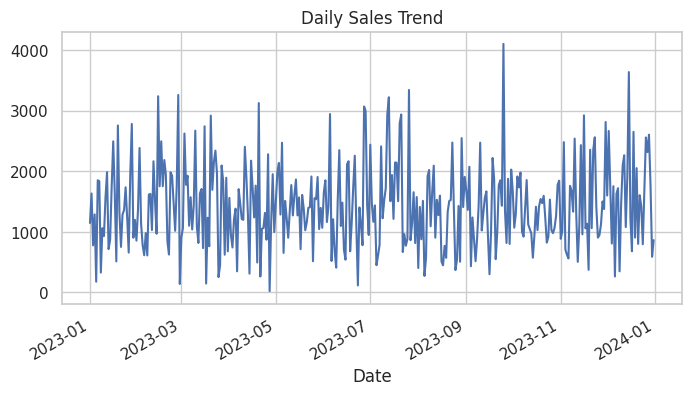

In [5]:
# Load data
sales = pd.read_csv("supermarket_sales.csv")

# Explore
print(sales.head())
print(sales.isnull().sum())

# Convert Date
sales['Date'] = pd.to_datetime(sales['Date'])

# KPIs
print("Total Sales:", sales['Total'].sum())
print("Average Transaction:", sales['Total'].mean())

# 1️⃣ Daily Sales Trend
sales.groupby('Date')['Total'].sum().plot(figsize=(8,4))
plt.title("Daily Sales Trend")
plt.show()



#PROJECT 2: STUDENT PERFORMANCE ANALYSIS (EDUCATION)

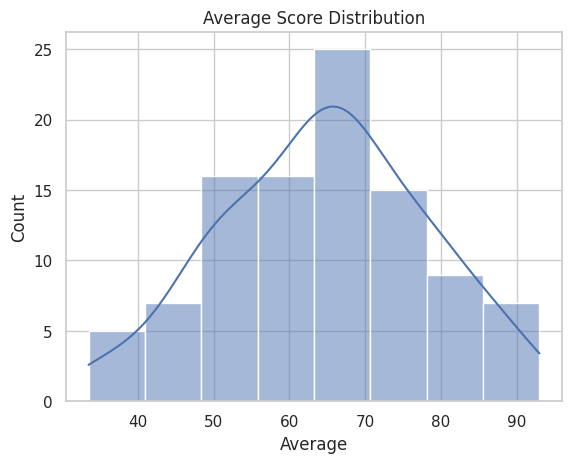

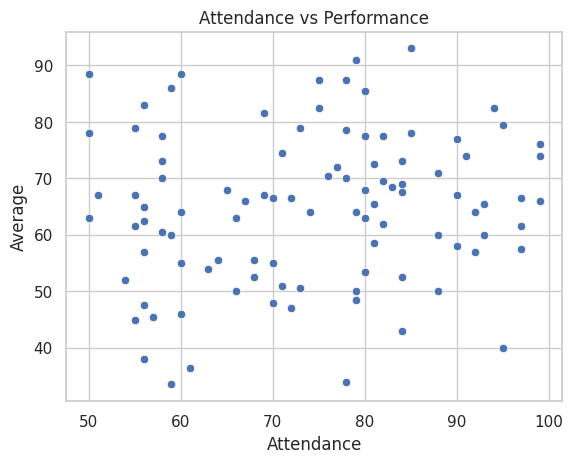

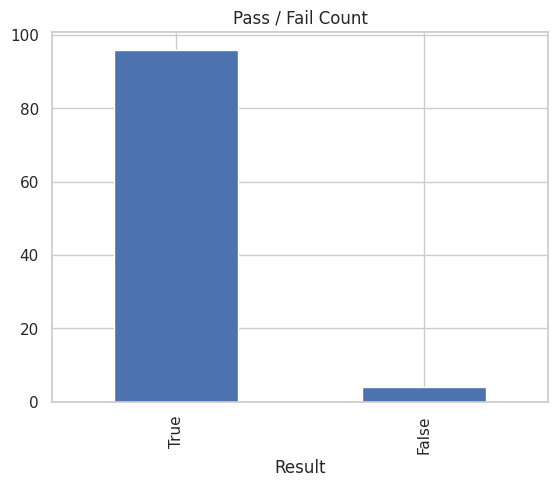

Pass Rate (%):
Result
True     96.0
False     4.0
Name: proportion, dtype: float64


In [7]:
# Create dataset
students = pd.DataFrame({
    "Student_ID": range(1, 101),
    "Math": np.random.randint(30, 100, 100),
    "Science": np.random.randint(30, 100, 100),
    "Attendance": np.random.randint(50, 100, 100)
})

students['Average'] = students[['Math','Science']].mean(axis=1)
students['Result'] = students['Average'] >= 40

# 1️⃣ Score Distribution
sns.histplot(students['Average'], kde=True)
plt.title("Average Score Distribution")
plt.show()

# 2️⃣ Attendance vs Performance
sns.scatterplot(x='Attendance', y='Average', data=students)
plt.title("Attendance vs Performance")
plt.show()

# 3️⃣ Pass/Fail Ratio
students['Result'].value_counts().plot(kind='bar')
plt.title("Pass / Fail Count")
plt.show()

print("Pass Rate (%):")
print(students['Result'].value_counts(normalize=True) * 100)


#PROJECT 3: WEATHER DATA ANALYSIS

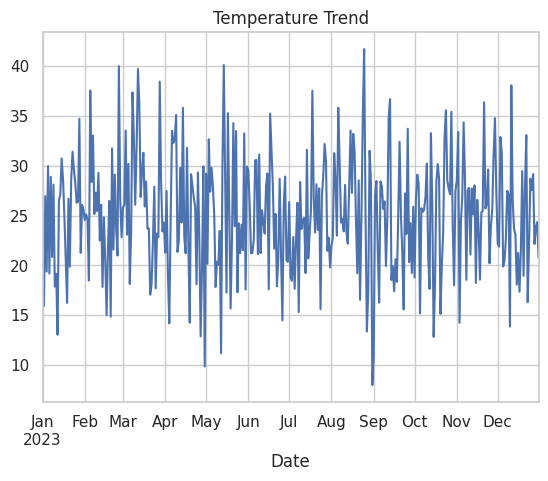

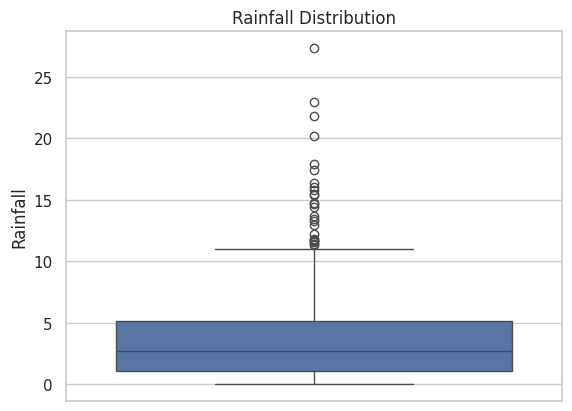

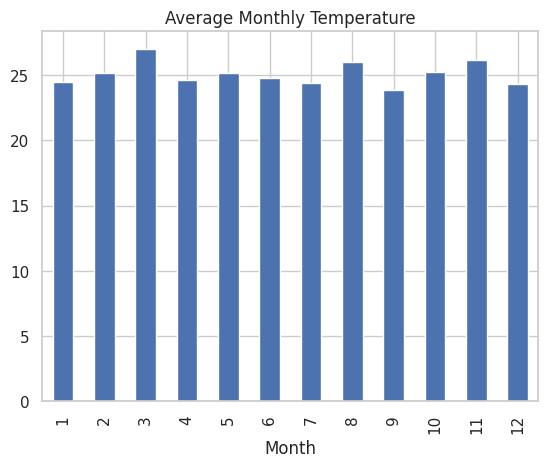

In [8]:
# Simulated weather data
dates = pd.date_range("2023-01-01", periods=365)
weather = pd.DataFrame({
    "Date": dates,
    "Temperature": np.random.normal(25, 6, 365),
    "Rainfall": np.random.exponential(4, 365)
})

# 1️⃣ Temperature Trend
weather.set_index("Date")['Temperature'].plot()
plt.title("Temperature Trend")
plt.show()

# 2️⃣ Rainfall Distribution
sns.boxplot(weather['Rainfall'])
plt.title("Rainfall Distribution")
plt.show()

# 3️⃣ Monthly Avg Temperature
weather['Month'] = weather['Date'].dt.month
weather.groupby('Month')['Temperature'].mean().plot(kind='bar')
plt.title("Average Monthly Temperature")
plt.show()


#PROJECT 4: HEALTHCARE (COVID-19 TREND ANALYSIS)

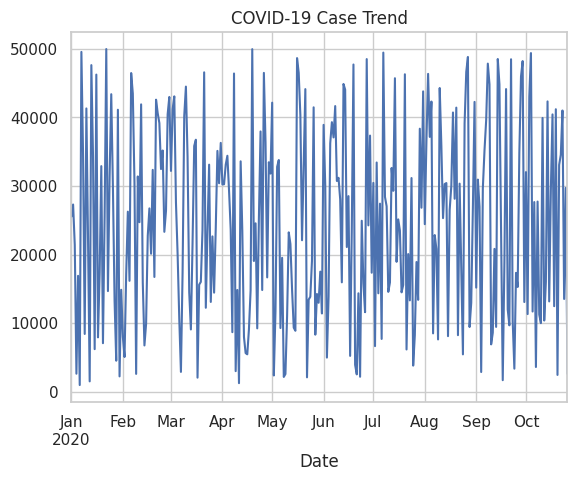

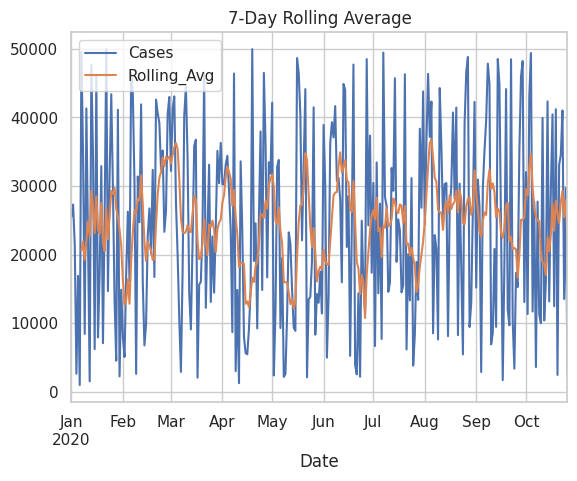

Peak Cases: 49962


In [9]:
covid = pd.DataFrame({
    "Date": pd.date_range("2020-01-01", periods=300),
    "Cases": np.random.randint(1000, 50000, 300)
})

# 1️⃣ Case Trend
covid.set_index("Date")['Cases'].plot()
plt.title("COVID-19 Case Trend")
plt.show()

# 2️⃣ Rolling Average
covid['Rolling_Avg'] = covid['Cases'].rolling(7).mean()
covid.set_index("Date")[['Cases','Rolling_Avg']].plot()
plt.title("7-Day Rolling Average")
plt.show()

# 3️⃣ Peak Analysis
print("Peak Cases:", covid['Cases'].max())


#PROJECT 5: FINANCE (STOCK MARKET ANALYSIS)

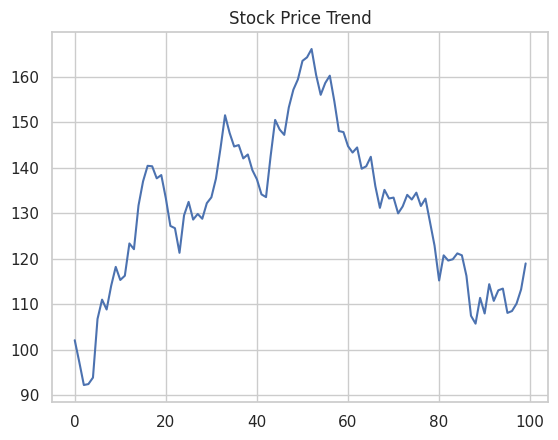

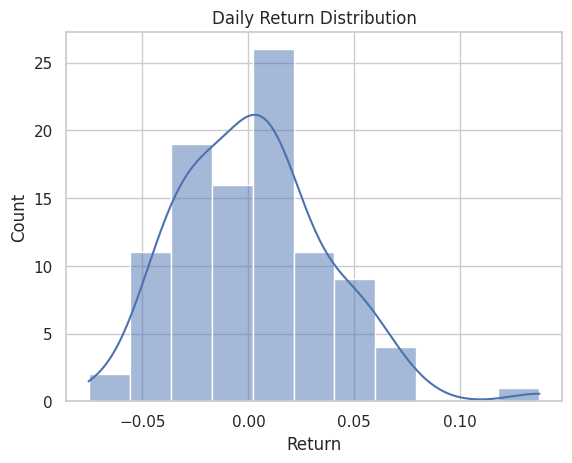

Mean Price: 130.80408704269942
Volatility (Std Dev): 17.14467940329662


In [10]:
# Simulated stock data
stock = pd.DataFrame({
    "Day": range(1, 101),
    "Price": np.cumsum(np.random.normal(0, 4, 100)) + 100
})

# 1️⃣ Price Trend
stock['Price'].plot()
plt.title("Stock Price Trend")
plt.show()

# 2️⃣ Daily Returns
stock['Return'] = stock['Price'].pct_change()
sns.histplot(stock['Return'].dropna(), kde=True)
plt.title("Daily Return Distribution")
plt.show()

# 3️⃣ Risk Metrics
print("Mean Price:", stock['Price'].mean())
print("Volatility (Std Dev):", stock['Price'].std())
